In [1]:
#Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('complete_dataset.csv')

In [5]:
df.head(10)

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Central,Pete area,12.962700,77.575800,730999,Bangalore,50712.430220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Central,Rajajinagar,12.990100,77.552500,981362,Bangalore,60967.535870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Central,Sadashivanagar,13.006800,77.581300,662625,Bangalore,59943.541560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Central,Seshadripuram,12.993500,77.578700,396862,Bangalore,58407.090340,NaN,NaN,NaN,NaN,NaN,NaN,s
9,9,Central,Shivajinagar,12.985700,77.605700,77836,Bangalore,55850.962100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [8]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [9]:
bangalore_population.to_csv('data/population_dataset.csv')

In [10]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [11]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099790
1,Central,Domlur,56837.022200
2,Central,Indiranagar,41991.817440
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063890


In [12]:
bangalore_income.to_csv('data/income_dataset.csv')

In [13]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.9623396203125 77.601752946875


In [14]:
CLIENT_ID = '0TR2ARLSU55RFHRQCP2N1YMK2DM25XXOBL2JNUEUODUCGY1B'
CLIENT_SECRET = 'V2N4QGTH0YSO31I53EPSLZA00DW3HAY1JVBBQ2S3RCAOJPE0'
VERSION = '20180606'
LIMIT = 150

In [15]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()

In [16]:
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [17]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [18]:
borough_colors

{'Central': '#BE0CD0',
 'Eastern': '#248378',
 'NorthEastern': '#C36969',
 'Northern': '#EACBD7',
 'SouthEastern': '#CD6AA0',
 'Southern': '#20E66B',
 'SouthernSuburbs': '#DE921D',
 'Western': '#72C457'}

In [19]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [20]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)

In [21]:
bangalore_map

In [22]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [23]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [24]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  593


In [25]:

bangalore_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
2,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
3,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
4,Cantonment area,Central,12.972442,77.580643,Hotel Bangalore Gate,12.973507,77.579144,Hotel


In [26]:
bangalore_vindividual_bangalore_venue_countenues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       109
Café                     31
Fast Food Restaurant     29
Bakery                   24
Ice Cream Shop           21
Department Store         20
Pizza Place              18
Coffee Shop              16
Chinese Restaurant       15
Hotel                    12
Name: Neighborhood, dtype: int64

In [27]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  127


In [28]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [29]:
individual_bangalore_venue_count

Borough
Borough Neighborhood                 
Central Cantonment area             6
        Domlur                     11
        Indiranagar                63
        Jeevanbheemanagar           6
        Malleswaram                 6
...                               ...
Western Mahalakshmi Layout         11
        Nagarbhavi                  6
        Nayandahalli                3
        Rajarajeshwari Nagar        7
        Vijayanagar                 4

[62 rows x 1 columns]

In [30]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [31]:
individual_bangalore_venue_count.reset_index(inplace=True)

In [32]:
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,6
1,Central,Domlur,11
2,Central,Indiranagar,63
3,Central,Jeevanbheemanagar,6
4,Central,Malleswaram,6
...,...,...,...
57,Western,Mahalakshmi Layout,11
58,Western,Nagarbhavi,6
59,Western,Nayandahalli,3
60,Western,Rajarajeshwari Nagar,7


[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Vidyaranyapura'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Bommasan

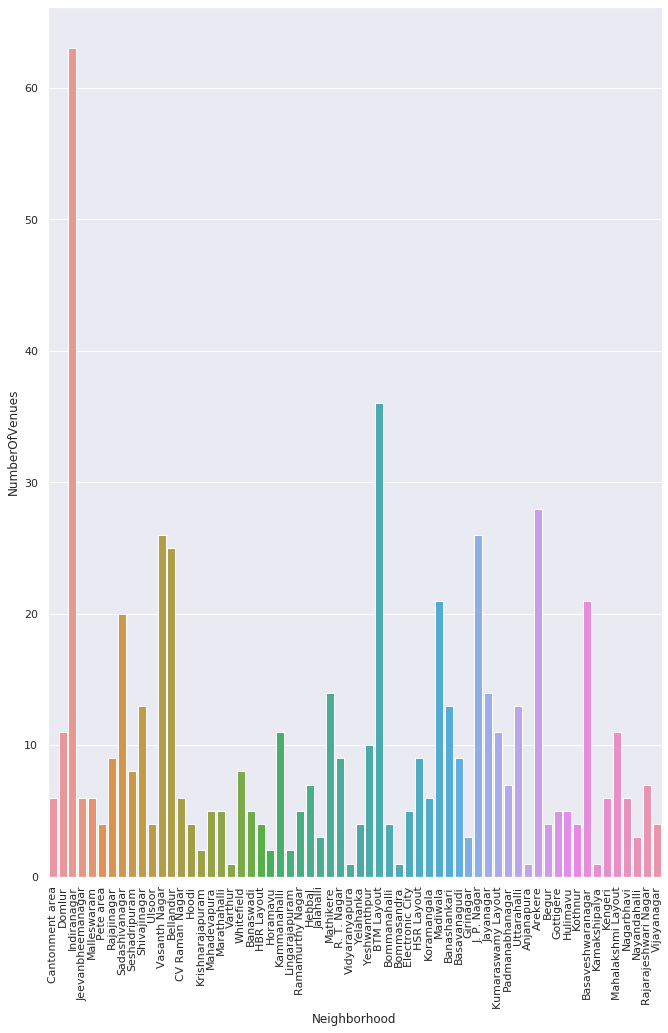

In [33]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

In [34]:
bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
224,Whitefield,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
225,Whitefield,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
226,Whitefield,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
227,Whitefield,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
228,Whitefield,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
229,Whitefield,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
230,Whitefield,Eastern,12.9698,77.7499,Glen's Bakehouse,12.967490,77.749565,Bakery
231,Whitefield,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café


In [35]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])

In [36]:
bangalore_venues_onehot

,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,...,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Arekere,0.00,0.0,0.0,0.0,0.035714,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,BTM Layout,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.055556,...,0.0,0.0,0.00,0.0,0.0,0.055556,0.0,0.0,0.0,0.0
3,Banashankari,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,Banaswadi,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.200000,...,0.0,0.0,0.00,0.0,0.0,0.200000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Vidyaranyapura,1.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
58,Vijayanagar,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.250000,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
59,Whitefield,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.250000,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
60,Yelahanka,0.25,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.25,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [41]:
number_of_top_venues = 5

In [42]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Anjanapura ---------
                                  Venue  Frequency
0                    Venue Category_ATM        1.0
1          Venue Category_Moving Target        0.0
2            Venue Category_Pizza Place        0.0
3               Venue Category_Pharmacy        0.0
4  Venue Category_Performing Arts Venue        0.0


--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.21
1  Venue Category_Sporting Goods Shop       0.14
2          Venue Category_Pizza Place       0.07
3       Venue Category_Breakfast Spot       0.04
4         Venue Category_Dessert Shop       0.04


--------- BTM Layout ---------
                                 Venue  Frequency
0     Venue Category_Indian Restaurant       0.19
1        Venue Category_Ice Cream Shop       0.08
2    Venue Category_Chinese Restaurant       0.08
3           Venue Category_Snack Place       0.08
4  Venue Category_Fast Food Restaurant       0.06


----

In [43]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [44]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,Venue Category_ATM,Venue Category_Food Truck,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Department Store,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Business Service,Venue Category_Bus Line
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Pizza Place,Venue Category_Coffee Shop,Venue Category_Fast Food Restaurant,Venue Category_Bakery,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant
3,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,Venue Category_Men's Store,Venue Category_Indian Restaurant
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Market,Venue Category_Café,Venue Category_Bakery,Venue Category_Yoga Studio,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop


In [45]:
neighborhoods_venues_sorted.shape

(62, 11)

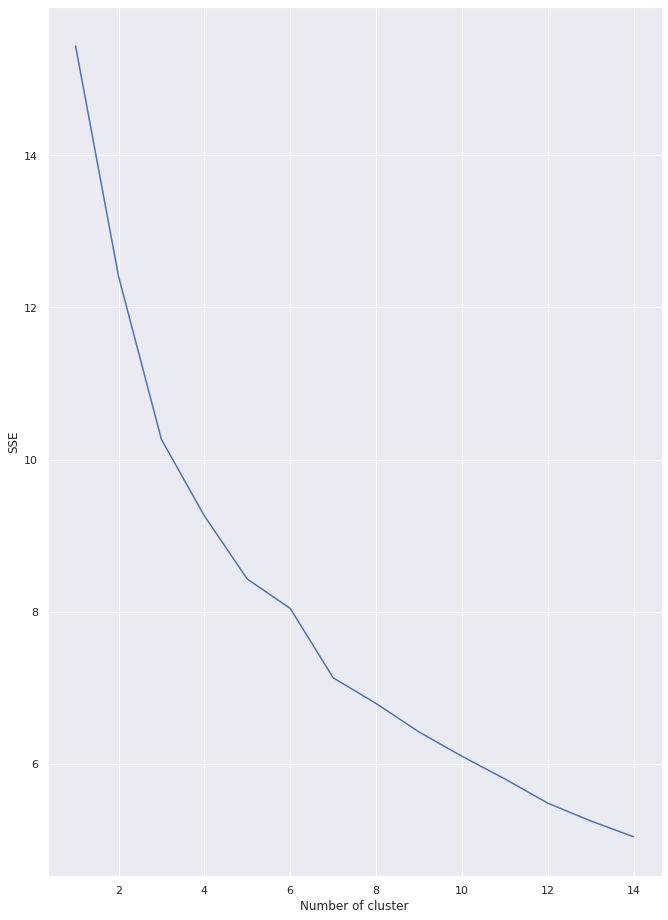

In [46]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [47]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [48]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [49]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [50]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    28
1     5
2     4
3     6
4    19
Name: Neighborhood, dtype: int64

In [51]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Andhra Restaurant', 'Venue Category_Art Museum',
       'Venue Category_Asian Restaurant', 'Venue Category_Athletics & Sports',
       'Venue Category_Auto Garage', 'Venue Category_BBQ Joint',
       'Venue Category_Badminton Court', 'Venue Category_Bakery',
       ...
       'Venue Category_Toy / Game Store', 'Venue Category_Train Station',
       'Venue Category_Travel & Transport', 'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Wine Bar',
       'Venue Category_Women's Store', 'Venue Category_Yoga Studio',
       'Cluster'],
      dtype='object', length=129)

In [52]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [53]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,Venue Category_ATM,Venue Category_Food Truck,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Department Store,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Business Service,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Pizza Place,Venue Category_Coffee Shop,Venue Category_Fast Food Restaurant,Venue Category_Bakery,Venue Category_Sandwich Place,...,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0
3,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,Venue Category_Men's Store,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4


In [54]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [55]:
# create map
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [56]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [57]:
map_clusters

In [58]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099790
1,Central,Domlur,56837.022200
2,Central,Indiranagar,41991.817440
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063890


In [59]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [60]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [61]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099790,0.293051
1,Central,Domlur,56837.022200,0.879225
2,Central,Indiranagar,41991.817440,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063890,0.824047


In [62]:
bangalore_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [63]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arekere,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BTM Layout,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,2,0,0,0,0
3,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Banaswadi,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [64]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     0
2     2
3     0
4     1
     ..
57    0
58    0
59    0
60    0
61    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 62, dtype: uint8

In [65]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [66]:
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [67]:
bangalore_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Anjanapura,0
1,Arekere,0
2,BTM Layout,2
3,Banashankari,0
4,Banaswadi,1


In [68]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))

In [69]:

bangalore_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Anjanapura,0,1.0
1,Arekere,0,1.0
2,BTM Layout,2,0.0
3,Banashankari,0,1.0
4,Banaswadi,1,0.5
5,Basavanagudi,0,1.0
6,Basaveshwaranagar,0,1.0
7,Begur,0,1.0
8,Bellandur,0,1.0
9,Bommanahalli,0,1.0


In [70]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

In [71]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']

In [72]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,571,Whitefield,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,0.0,0.0,4,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
1,572,Whitefield,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,0.0,0.0,4,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
2,573,Whitefield,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,0.0,0.0,4,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
3,574,Whitefield,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,0.0,0.0,4,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
4,575,Whitefield,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,0.0,0.0,4,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
5,576,Whitefield,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,0.0,0.0,4,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
6,577,Whitefield,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,0.0,0.0,4,Eastern,12.9698,77.7499,Glen's Bakehouse,12.967490,77.749565,Bakery
7,578,Whitefield,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,0.0,0.0,4,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café


In [73]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [74]:
target_cluster

4

In [75]:
print("The target cluster is : ",target_cluster)

The target cluster is :  4


In [76]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
65,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,Venue Category_Men's Store,...,0.0,0.0,4,Southern,12.9255,77.5468,Anna Kuteera,12.926094,77.550367,Indian Restaurant
66,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,Venue Category_Men's Store,...,0.0,0.0,4,Southern,12.9255,77.5468,cafe coffee day,12.924896,77.545873,Café
67,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,Venue Category_Men's Store,...,0.0,0.0,4,Southern,12.9255,77.5468,Pizza Hut,12.924959,77.550755,Pizza Place
68,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,Venue Category_Men's Store,...,0.0,0.0,4,Southern,12.9255,77.5468,Taaza tindi,12.926047,77.548575,Breakfast Spot
69,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,Venue Category_Men's Store,...,0.0,0.0,4,Southern,12.9255,77.5468,MSP Moto World,12.927199,77.547503,Motorcycle Shop


In [77]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 212 neighborhoods which has similar characteristics to Whitefield.


In [78]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,65,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,4,Southern,12.9255,77.5468,Anna Kuteera,12.926094,77.550367,Indian Restaurant
1,66,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,4,Southern,12.9255,77.5468,cafe coffee day,12.924896,77.545873,Café
2,67,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,4,Southern,12.9255,77.5468,Pizza Hut,12.924959,77.550755,Pizza Place
3,68,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,4,Southern,12.9255,77.5468,Taaza tindi,12.926047,77.548575,Breakfast Spot
4,69,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,4,Southern,12.9255,77.5468,MSP Moto World,12.927199,77.547503,Motorcycle Shop


In [79]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [80]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [81]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,Venue Category_Men's Store,...,Anna Kuteera,12.926094,77.550367,Indian Restaurant,810407,0.823908,57524.20953,0.889855,0,1.0
1,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,Venue Category_Men's Store,...,cafe coffee day,12.924896,77.545873,Café,810407,0.823908,57524.20953,0.889855,0,1.0
2,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,Venue Category_Men's Store,...,Pizza Hut,12.924959,77.550755,Pizza Place,810407,0.823908,57524.20953,0.889855,0,1.0
3,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,Venue Category_Men's Store,...,Taaza tindi,12.926047,77.548575,Breakfast Spot,810407,0.823908,57524.20953,0.889855,0,1.0
4,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,Venue Category_Men's Store,...,MSP Moto World,12.927199,77.547503,Motorcycle Shop,810407,0.823908,57524.20953,0.889855,0,1.0


In [82]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [83]:
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,Venue Category_Men's Store,...,12.926094,77.550367,Indian Restaurant,810407,0.823908,57524.20953,0.889855,0,1.0,0.823403
1,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,Venue Category_Men's Store,...,12.926221,77.550582,Fast Food Restaurant,810407,0.823908,57524.20953,0.889855,0,1.0,0.823403
2,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,Venue Category_Men's Store,...,12.924896,77.545873,Café,810407,0.823908,57524.20953,0.889855,0,1.0,0.823403
3,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,Venue Category_Men's Store,...,12.926899,77.550973,Shoe Store,810407,0.823908,57524.20953,0.889855,0,1.0,0.823403
4,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Miscellaneous Shop,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Motorcycle Shop,Venue Category_Fast Food Restaurant,Venue Category_Men's Store,...,12.926891,77.551068,Clothing Store,810407,0.823908,57524.20953,0.889855,0,1.0,0.823403


In [84]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [85]:
top3_df = pd.DataFrame(top3).reset_index()

In [86]:
top3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Pizza Place,[0.8234029969298623]
1,Begur,Venue Category_ATM,Venue Category_Supermarket,Venue Category_Food Court,[0.7361321887298261]
2,Electronic City,Venue Category_Toll Plaza,Venue Category_Furniture / Home Store,Venue Category_Outlet Store,[0.5423513638776338]
